<h1>Expl project 1</h2>

In [54]:
# loading libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm

In [14]:
# loading the data file

target_file = 'WAGE1.DTA'
found = False

for root, dirs, files in os.walk('.'):
    if target_file in files:
        # Construct the full file path
        file_path = os.path.join(root, target_file)
        print(f"Found '{target_file}' at: {file_path}")
        df = pd.read_stata(file_path)
        print("Stata file loaded successfully!")
        found = True
        break

if not found:
    print(f"The file '{target_file}' was not found.")

Found 'WAGE1.DTA' at: ./WAGE1.DTA
Stata file loaded successfully!


<h2>Summary statistics</h2>

In [16]:
print(df.shape)
df.head(5)
print(df.isna().sum())

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,0,0,1,0,0,0,1,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,4


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float32
 1   educ      526 non-null    int8   
 2   exper     526 non-null    int8   
 3   tenure    526 non-null    int8   
 4   nonwhite  526 non-null    int8   
 5   female    526 non-null    int8   
 6   married   526 non-null    int8   
 7   numdep    526 non-null    int8   
 8   smsa      526 non-null    int8   
 9   northcen  526 non-null    int8   
 10  south     526 non-null    int8   
 11  west      526 non-null    int8   
 12  construc  526 non-null    int8   
 13  ndurman   526 non-null    int8   
 14  trcommpu  526 non-null    int8   
 15  trade     526 non-null    int8   
 16  services  526 non-null    int8   
 17  profserv  526 non-null    int8   
 18  profocc   526 non-null    int8   
 19  clerocc   526 non-null    int8   
 20  servocc   526 non-null    int8  

In [60]:
print(df['wage'].describe())

count    526.000000
mean       5.896103
std        3.693085
min        0.530000
25%        3.330000
50%        4.650000
75%        6.880000
max       24.980000
Name: wage, dtype: float64



Education Distribution:
Years of Education  Count Percentage
                 0      2      0.38%
                 2      1      0.19%
                 3      1      0.19%
                 4      3      0.57%
                 5      1      0.19%
                 6      6      1.14%
                 7      4      0.76%
                 8     22      4.18%
                 9     17      3.23%
                10     30       5.7%
                11     29      5.51%
                12    198     37.64%
                13     39      7.41%
                14     53     10.08%
                15     21      3.99%
                16     68     12.93%
                17     12      2.28%
                18     19      3.61%
             Total    526     100.0%


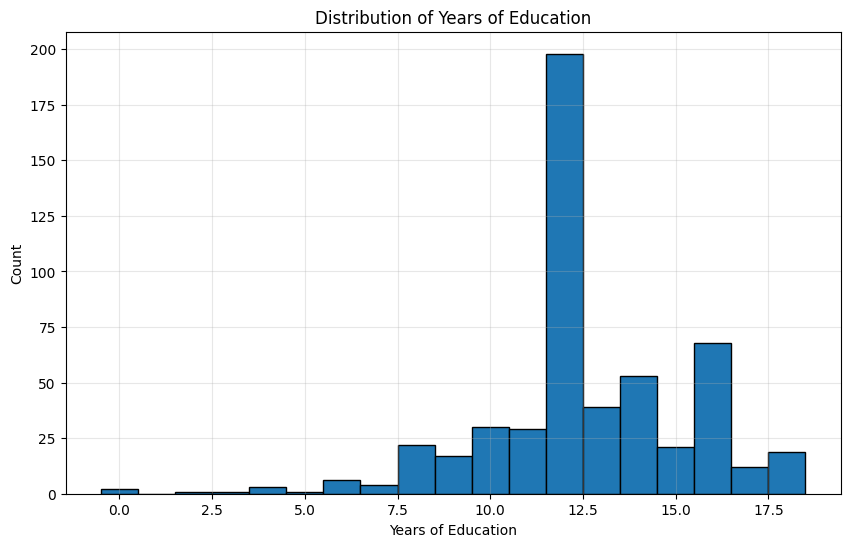

In [69]:
educ_counts = df['educ'].value_counts().sort_index()
educ_table = pd.DataFrame({
    'Years of Education': educ_counts.index,
    'Count': educ_counts.values,
    'Percentage': (educ_counts.values / len(df) * 100).round(2)
})

# add total row
total_row = pd.DataFrame({
    'Years of Education': ['Total'],
    'Count': [len(df)],
    'Percentage': [100.00]
})

# combine and format
final_table = pd.concat([educ_table, total_row])
final_table['Percentage'] = final_table['Percentage'].astype(str) + '%'

# display the formatted table
print("\nEducation Distribution:")
print(final_table.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.hist(df['educ'], bins=range(min(df['educ']), max(df['educ']) + 2, 1), 
         edgecolor='black', align='left')
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

<h2>Simple regression</h2>

In [79]:
# simple regression of wage on education
X = df['educ']
X = sm.add_constant(X)
y = df['wage']

# run regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.78e-22
Time:                        14:51:25   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

In [85]:
# get fitted values (predicted wages)
df['wage_hat'] = model.predict(X)

# actual vs predicted values
print("\nFirst few actual vs predicted wages:")
print(df[['wage', 'wage_hat']].head(10))


First few actual vs predicted wages:
   wage  wage_hat
0  3.10      5.05
1  3.24      5.59
2  3.00      5.05
3  6.00      3.43
4  5.30      5.59
5  8.75      7.76
6 11.25      8.84
7  5.00      5.59
8  3.60      5.59
9 18.18      8.30


In [107]:
# get residuals
df['wage_resid'] = model.resid

# see the first few residuals
print(df[['wage', 'wage_hat', 'wage_resid']].head())

# verify that residuals have mean zero
print("\nMean of residuals:", df['e_wage'].mean())

   wage  wage_hat  wage_resid
0  3.10      5.05       -1.95
1  3.24      5.59       -2.35
2  3.00      5.05       -2.05
3  6.00      3.43        2.57
4  5.30      5.59       -0.29

Mean of residuals: -6.835259017007808e-15



Verifying OLS properties:
Average actual wage: 5.896103
Average predicted wage: 5.896102674787042
Difference: 2.3048639530287574e-07

Mean of residual: -6.835259017007808e-15

Summary statistics:
        wage  wage_hat  wage_resid
count 526.00    526.00      526.00
mean    5.90      5.90       -0.00
std     3.69      1.50        3.38
min     0.53     -0.90       -5.34
25%     3.33      5.59       -2.15
50%     4.65      5.59       -0.97
75%     6.88      6.67        1.19
max    24.98      8.84       16.61


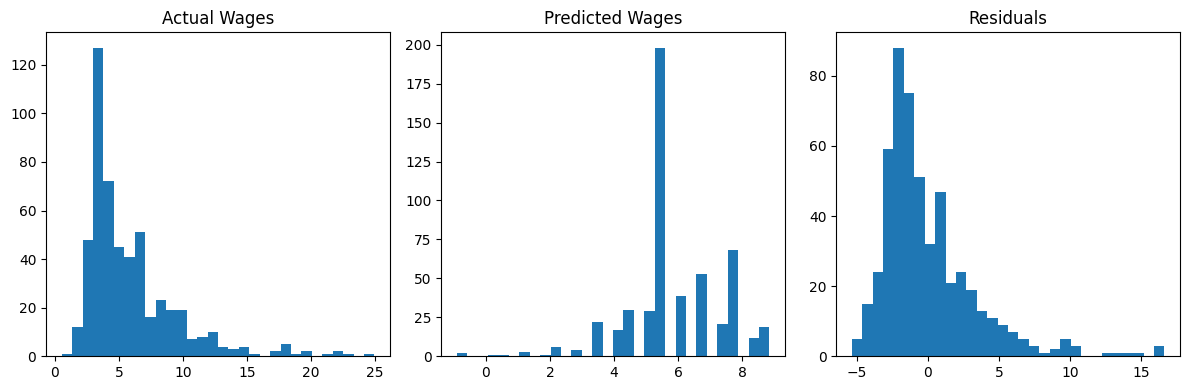

In [109]:
# check property 1: average(wage) = average(wage_hat)
print("\nVerifying OLS properties:")
print("Average actual wage:", df['wage'].mean())
print("Average predicted wage:", df['wage_hat'].mean())
print("Difference:", df['wage'].mean() - df['wage_hat'].mean())

# check property 2: average(e_wage) = 0
print("\nMean of residual:", df['wage_resid'].mean())

# comprehensive summary of all three variables
print("\nSummary statistics:")
print(df[['wage', 'wage_hat', 'wage_resid']].describe())

# visual check of the distributions
plt.figure(figsize=(12, 4))

# actual wages
plt.subplot(131)
plt.hist(df['wage'], bins=30)
plt.title('Actual Wages')

# predicted wages
plt.subplot(132)
plt.hist(df['wage_hat'], bins=30)
plt.title('Predicted Wages')

# residuals
plt.subplot(133)
plt.hist(df['wage_resid'], bins=30)
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [111]:
# generate the product of education and residuals
df['educ_wage_resid'] = df['educ'] * df['wage_resid']

# check the sum and mean
print("Sum of educ * residuals:", df['educ_wage_resid'].sum())
print("Mean of educ * residuals:", df['educ_wage_resid'].mean())

# can also check correlation directly
correlation = df['educ'].corr(df['wage_resid'])
print("\nCorrelation between education and residuals:", correlation)

# summary statistics of the product
print("\nSummary of education * residuals:")
print(df['educ_wage_resid'].describe())

Sum of educ * residuals: -4.5702108764089644e-11
Mean of educ * residuals: -8.688613833477118e-14

Correlation between education and residuals: -2.295292219716969e-16

Summary of education * residuals:
count   526.00
mean     -0.00
std      47.60
min     -96.11
25%     -28.10
50%     -11.47
75%      12.94
max     290.53
Name: educ_wage_resid, dtype: float64


<h4>Interpretation of the output</h4>
<p>Orthogonality Condition:</p>
<ul>
    <li>The sum and mean of (education × residuals) are effectively zero (-4.57e-11 and -8.69e-14)and the correlation between education and residuals is also practically zero (-2.29e-16). This verifies that residuals are uncorrelated with the independent variable (education).</li>
</ul>
<p>Distribution of education × residuals:</p>
<ul>
    <li>Mean is zero (-0.00)</li>
    <li>Values range from -96.11 to 290.53</li>
    <li>Median (-11.47) and interquartile range (-28.10 to 12.94) show some asymmetry</li>
    <li>Standard deviation of 47.60 indicates considerable spread</li>
</ul>

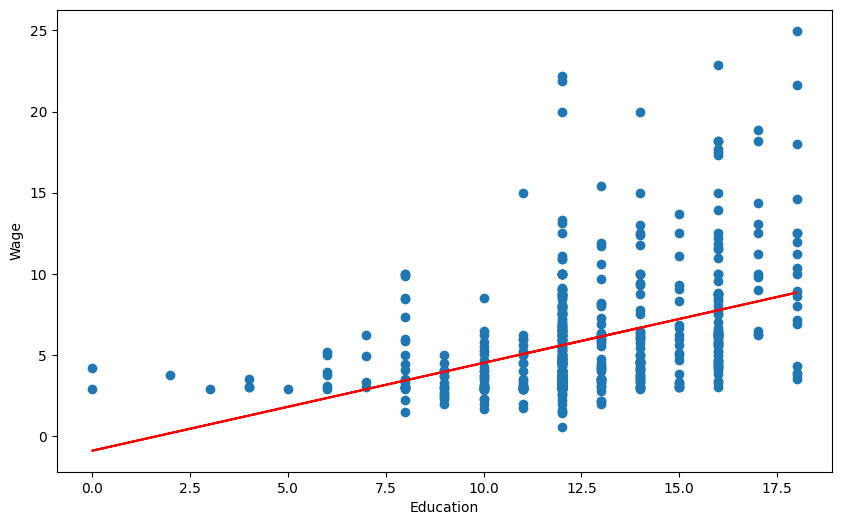

In [118]:
# generate scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['educ'], df['wage'])
plt.plot(df['educ'], df['wage_hat'], color='red')
plt.xlabel('Education')
plt.ylabel('Wage')
plt.show()
plt.close()

<h2>Log transfroamtion</h2>

In [129]:
# Create log transformation
df['log_wage'] = np.log(df['wage'])

# Prepare data for regression
X = df['educ']
X = sm.add_constant(X)
y = df['log_wage']

# Run log wage regression
log_model = sm.OLS(y, X).fit()
print("\nRegression Results:")
print(log_model.summary())

# Get predicted values and residuals
df['log_wage_hat'] = log_model.predict(X)
df['log_wage_resid'] = log_model.resid

# Summary statistics
print("\nDetailed summary of log wage:")
print(df['log_wage'].describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99]))

# Verify OLS properties
print("\nVerifying OLS properties:")
print("Average actual log wage:", df['log_wage'].mean())
print("Average predicted log wage:", df['log_wage_hat'].mean())
print("Average residual:", df['log_wage_resid'].mean())

# Check independence of residuals
df['educ_log_resid'] = df['educ'] * df['log_wage_resid']
print("\nCorrelation between education and log residuals:", 
     df['educ'].corr(df['log_wage_resid']))


Regression Results:
                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           3.27e-25
Time:                        16:44:02   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5838      0.09

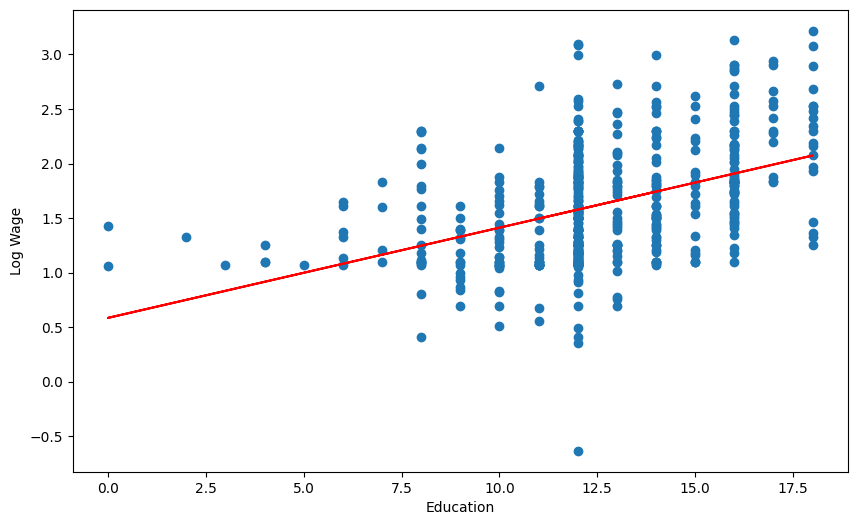

In [123]:
# Scatter plot for log wage
plt.figure(figsize=(10, 6))
plt.scatter(df['educ'], df['log_wage'])
plt.plot(df['educ'], df['plog_wage'], color='red')
plt.xlabel('Education')
plt.ylabel('Log Wage')
plt.savefig('fig2.eps')
plt.show()
plt.close()


Comparison of actual vs predicted values:
   Actual Log Wage  Predicted Log Wage  Residual  Education
0             1.13                1.49     -0.36         11
1             1.18                1.58     -0.40         12
2             1.10                1.49     -0.40         11
3             1.79                1.25      0.55          8
4             1.67                1.58      0.09         12
5             2.17                1.91      0.26         16
6             2.42                2.07      0.35         18
7             1.61                1.58      0.03         12
8             1.28                1.58     -0.30         12
9             2.90                1.99      0.91         17

Summary statistics of predictions:
       Actual Log Wage  Predicted Log Wage  Residual  Education
count           526.00              526.00    526.00     526.00
mean              1.62                1.62     -0.00      12.56
std               0.53                0.23      0.48       2.77
min  

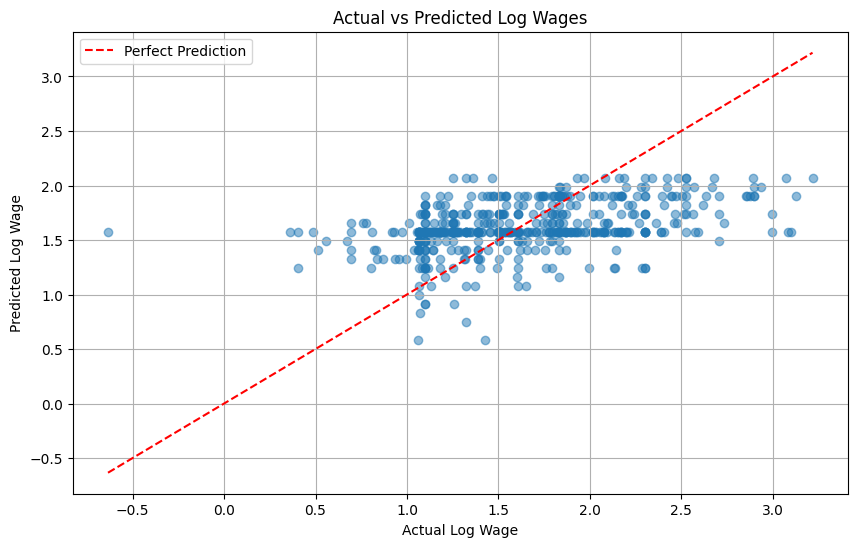

In [131]:
# actual vs predicted values
comparison = pd.DataFrame({
    'Actual Log Wage': df['log_wage'],
    'Predicted Log Wage': df['log_wage_hat'],
    'Residual': df['log_e_wage'],
    'Education': df['educ']
})

# display first few rows
print("\nComparison of actual vs predicted values:")
print(comparison.head(10))

# summary statistics of predictions
print("\nSummary statistics of predictions:")
print(comparison.describe())

# scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(df['log_wage'], df['log_wage_hat'], alpha=0.5)
plt.plot([df['log_wage'].min(), df['log_wage'].max()], 
         [df['log_wage'].min(), df['log_wage'].max()], 
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Log Wage')
plt.ylabel('Predicted Log Wage')
plt.title('Actual vs Predicted Log Wages')
plt.legend()
plt.grid(True)
plt.show()

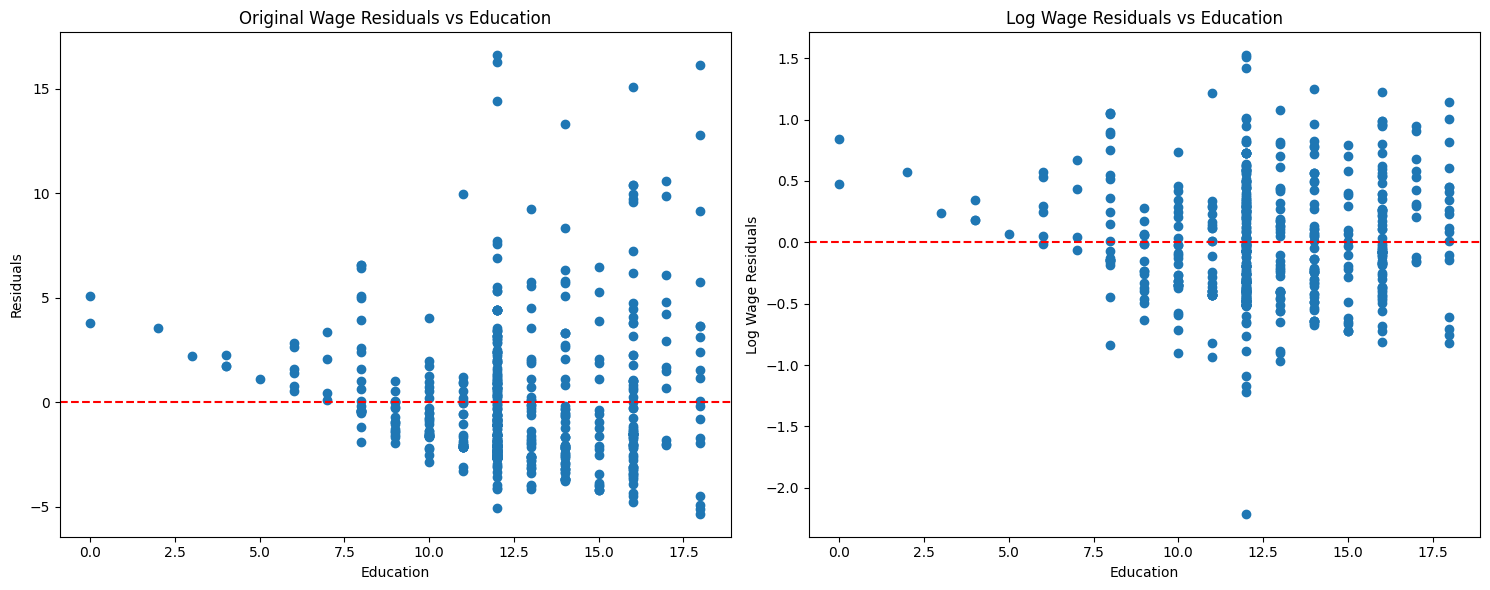

In [125]:
# visualize heteroskedasticity before and after log transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# plot original wage residuals
ax1.scatter(df['educ'], df['e_wage'])
ax1.set_xlabel('Education')
ax1.set_ylabel('Residuals')
ax1.set_title('Original Wage Residuals vs Education')
ax1.axhline(y=0, color='r', linestyle='--')

# regression with log wage and plot its residuals
X = sm.add_constant(df['educ'])
log_model = sm.OLS(df['log_wage'], X).fit()
df['log_residuals'] = log_model.resid

ax2.scatter(df['educ'], df['log_residuals'])
ax2.set_xlabel('Education')
ax2.set_ylabel('Log Wage Residuals')
ax2.set_title('Log Wage Residuals vs Education')
ax2.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

<h2>Experience Analysis</h2>

In [42]:
# experience analysis
print(df['exper'].describe())
df['expersq'] = df['exper'] ** 2

# multiple regression with experience
X_full = df[['educ', 'exper', 'expersq']]
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y_log, X_full).fit()
print(model_full.summary())

count    526.00000
mean      17.01711
std       13.57216
min        1.00000
25%        5.00000
50%       13.50000
75%       26.00000
max       51.00000
Name: exper, dtype: float64
                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     57.91
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           2.49e-32
Time:                        18:34:59   Log-Likelihood:                -337.88
No. Observations:                 526   AIC:                             683.8
Df Residuals:                     522   BIC:                             700.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std e